In [1]:
!pip install keras-preprocessing


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from keras.utils import to_categorical 
from keras_preprocessing.image import load_img
from keras.models import Sequential 
from keras.layers import Dense,Conv2D , Dropout , Flatten , MaxPooling2D
import os
import pandas as pd
import numpy as np

In [3]:
TRAIN_DIR = 'images/images/train'
TEST_DIR = 'images/images/validation'

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels

In [5]:
train =pd.DataFrame()
train['image'],train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
print(train)

                                       image     label
0            images/images/train\angry\0.jpg     angry
1            images/images/train\angry\1.jpg     angry
2           images/images/train\angry\10.jpg     angry
3        images/images/train\angry\10002.jpg     angry
4        images/images/train\angry\10016.jpg     angry
...                                      ...       ...
28816  images/images/train\surprise\9969.jpg  surprise
28817  images/images/train\surprise\9985.jpg  surprise
28818  images/images/train\surprise\9990.jpg  surprise
28819  images/images/train\surprise\9992.jpg  surprise
28820  images/images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [7]:
test =pd.DataFrame()
test['image'],test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(test)
print(test['image'])

                                           image     label
0       images/images/validation\angry\10052.jpg     angry
1       images/images/validation\angry\10065.jpg     angry
2       images/images/validation\angry\10079.jpg     angry
3       images/images/validation\angry\10095.jpg     angry
4       images/images/validation\angry\10121.jpg     angry
...                                          ...       ...
7061  images/images/validation\surprise\9806.jpg  surprise
7062  images/images/validation\surprise\9830.jpg  surprise
7063  images/images/validation\surprise\9853.jpg  surprise
7064  images/images/validation\surprise\9878.jpg  surprise
7065   images/images/validation\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/images/validation\angry\10052.jpg
1         images/images/validation\angry\10065.jpg
2         images/images/validation\angry\10079.jpg
3         images/images/validation\angry\10095.jpg
4         images/images/validation\angry\10121.jpg
            

In [9]:
from tqdm.notebook import tqdm

In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale = True)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [11]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

D:\anaconda3\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [12]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [13]:
x_train = train_features /255.0
x_test = test_features/255.0

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
le.fit(train['label'])


LabelEncoder()

In [16]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [17]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [18]:
model = Sequential()
model.add(Conv2D(128,kernel_size=(3,3),activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0,4))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0,4))


model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0,4))


model.add(Conv2D(512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0,4))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0,4))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0,3))
model.add(Dense(7,activation='softmax'))




D:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.fit(x=x_train,y=y_train,batch_size=128,epochs = 100,validation_data=(x_test,y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 740s 3s/step - accuracy: 0.2384 - loss: 1.8278 - val_accuracy: 0.2583 - val_loss: 1.7875
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 2491s 11s/step - accuracy: 0.2724 - loss: 1.7566 - val_accuracy: 0.4124 - val_loss: 1.5220
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 778s 3s/step - accuracy: 0.4377 - loss: 1.4372 - val_accuracy: 0.4779 - val_loss: 1.3389
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1705s 8s/step - accuracy: 0.5159 - loss: 1.2591 - val_accuracy: 0.5321 - val_loss: 1.2426
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 536s 2s/step - accuracy: 0.5684 - loss: 1.1335 - val_accuracy: 0.5548 - val_loss: 1.1748
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 529s 2s/step - accuracy: 0.6123 - loss: 1.0295 - val_accuracy: 0.5679 - val_loss: 1.1438
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 8086s 36s/step - accuracy: 0.6474 - loss: 0.9404 - val_accuracy: 0.5781 - val_loss: 1.1662
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 658s 3s/step - accuracy: 0.6984 - loss: 0.82

226/226 ━━━━━━━━━━━━━━━━━━━━ 692s 3s/step - accuracy: 0.9821 - loss: 0.0518 - val_accuracy: 0.5693 - val_loss: 3.7037
Epoch 51/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 609s 3s/step - accuracy: 0.9844 - loss: 0.0471 - val_accuracy: 0.5509 - val_loss: 3.6512
Epoch 52/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 631s 3s/step - accuracy: 0.9818 - loss: 0.0486 - val_accuracy: 0.5699 - val_loss: 3.4250
Epoch 53/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 520s 2s/step - accuracy: 0.9897 - loss: 0.0318 - val_accuracy: 0.5726 - val_loss: 3.6615
Epoch 54/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 514s 2s/step - accuracy: 0.9857 - loss: 0.0404 - val_accuracy: 0.5698 - val_loss: 3.5617
Epoch 55/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 546s 2s/step - accuracy: 0.9899 - loss: 0.0309 - val_accuracy: 0.5699 - val_loss: 3.6334
Epoch 56/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 596s 3s/step - accuracy: 0.9906 - loss: 0.0251 - val_accuracy: 0.5753 - val_loss: 4.3212
Epoch 57/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 625s 3s/step - accuracy: 0.9809 - loss: 0.0599 - val_a

226/226 ━━━━━━━━━━━━━━━━━━━━ 616s 3s/step - accuracy: 0.9936 - loss: 0.0181 - val_accuracy: 0.5630 - val_loss: 4.2761
Epoch 100/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 613s 3s/step - accuracy: 0.9891 - loss: 0.0310 - val_accuracy: 0.5577 - val_loss: 4.0366


In [22]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
    
model.save("emotiondetector.keras")

In [23]:
from keras.models import model_from_json


In [25]:
label = ["angry","disgust","fear","happy","neutral","sad","surprise"]

In [38]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

# Fonction pour charger et prétraiter l'image
def ef(image):
    # Charger l'image en niveaux de gris
    img = load_img(image, color_mode="grayscale", target_size=(48, 48))
    
    # Convertir l'image en tableau numpy
    feature = img_to_array(img)
    
    # Reshaper l'image pour avoir les bonnes dimensions (1, 48, 48, 1)
    feature = feature.reshape(1, 48, 48, 1)
    
    # Normaliser les valeurs des pixels entre 0 et 1
    return feature / 255.0

In [39]:
# Chargement de l'image et prédiction du modèle
image_path = "images/images/train/angry/22.jpg"
print("original is angry")

# Prétraiter l'image
img = ef(image_path)

# Prédiction avec le modèle
pred = model.predict(img)

# Trouver le label prédit
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)

original is angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
model prediction is angry


original is sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
model prediction is sad


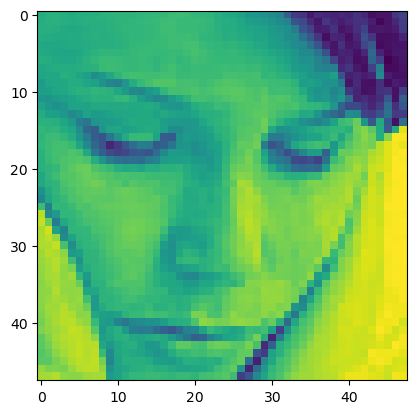

In [41]:
import matplotlib.pyplot as plt
# Chargement de l'image et prédiction du modèle
image_path = "images/images/train/sad/42.jpg"
print("original is sad")

# Prétraiter l'image
img = ef(image_path)

# Prédiction avec le modèle
pred = model.predict(img)

# Trouver le label prédit
pred_label = label[pred.argmax()]
print("model prediction is", pred_label)
plt.imshow(img.reshape(48,48))